Análise do Comportamento do Cliente:

Como o comportamento do cliente (número de visitas, tempo de navegação) está relacionado com o total gasto pelos clientes? Existem padrões claros que indicam clientes que gastam mais tempo no site tendem a gastar mais?

Vamos usar a Regressão Linear e Árvore de Decisão

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

-> Carregar os dados e análise

In [2]:
dados = pd.read_csv('dados_vendas.csv')
dados.head()

,ClientAge,WebVisits,BrowsingTime,ItemsPurchased,TotalSpent,StoreRating,DeliveryTime
0,56,52,201,7,755,1,7
1,69,66,162,11,962,2,8
2,46,43,223,8,637,1,9
3,32,30,239,7,476,4,4
4,60,58,191,9,847,3,7


In [3]:
dados.isna().sum()

ClientAge         0
WebVisits         0
BrowsingTime      0
ItemsPurchased    0
TotalSpent        0
StoreRating       0
DeliveryTime      0
dtype: int64

-> Preparando os dados para treinamento

In [4]:
X = dados[['WebVisits', 'BrowsingTime']]
y = dados['TotalSpent']

-> Dividindo os dados em treino e teste

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 1. REGRESSÃO LINEAR

Criando e treinando o modelo

In [7]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

Previsão com dados de teste

In [8]:
reg_pred = reg_model.predict(X_test)

Avaliação do modelo

In [10]:
mse = mean_squared_error(y_test, reg_pred)
r2 = r2_score(y_test, reg_pred)

print(f'Erro Quadrádico Médio: {mse:.2f}')
print(f'R²: {r2:.2f}')

Erro Quadrádico Médio: 802.88
R²: 0.99


#### 2. ÁRVORE DE DECISÃO

Criar e inicializar (treinar) o modelo

In [22]:
arvore = DecisionTreeRegressor()
arvore.fit(X_train, y_train)

DecisionTreeRegressor()

Previsão com dados de teste 

In [23]:
arvore_pred = arvore.predict(X_test)

Avaliação do modelo

In [25]:
mse = mean_squared_error(y_test, arvore_pred)
r2 = r2_score(y_test, arvore_pred)

print(f'Erro Quadrádico Médio: {mse:.2f}')
print(f'R²: {r2:.2f}')

Erro Quadrádico Médio: 1438.57
R²: 0.98


Gráfico: visualizar os resultados da regressão para entender como o modelo está se saindo com relação aos dados.

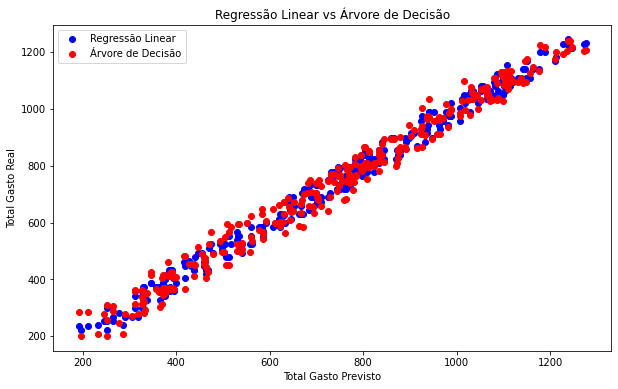

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, reg_pred, color='b', label='Regressão Linear')
plt.scatter(y_test, arvore_pred, color = 'r', label='Árvore de Decisão')
plt.ylabel('Total Gasto Real')
plt.xlabel('Total Gasto Previsto')
plt.title('Regressão Linear vs Árvore de Decisão')
plt.legend()
plt.show()